In [1]:
%matplotlib notebook
import os

import re
import csv

import numpy as np
import pandas as pd

import dicom
from collections import Counter

from data_utils import im_path_to_arr
from data_utils import arr_to_im_path
from mri_viewer import MRIViewer

In [7]:
# for RTOG
patient_id = 15
ex_path = '/local-scratch/romain_scratch/rtog/'
patient = os.listdir(ex_path)[patient_id - 1]
patient_path = os.path.join(ex_path, patient)
flair_path = os.path.join(patient_path, 'flair.nii')
flair_rtog = im_path_to_arr(flair_path)
t1post_path = os.path.join(patient_path, 't1c.nii')
t1post_rtog = im_path_to_arr(t1post_path)
print('shape of t1post rtog patient is:', t1post_rtog.shape)
print('shape of flair rtog patient is:', flair_rtog.shape)

shape of t1post rtog patient is: (21, 256, 256)
shape of flair rtog patient is: (21, 256, 256)


In [16]:
patient_path

'/local-scratch/romain_scratch/rtog/2009-11__Studies_151^137^825'

In [4]:
# for BraTS
patient_id = 17
ex_path = '/local-scratch/romain_scratch/brats2017/train/'
patient = os.listdir(ex_path)[patient_id - 1]
patient_path = os.path.join(ex_path, patient)
label_path = os.path.join(patient_path, patient + '_seg.nii')
label = im_path_to_arr(label_path)
flair_path = os.path.join(patient_path, patient + '_flair.nii')
flair_brats = im_path_to_arr(flair_path)
t1post_path = os.path.join(patient_path, patient + '_t1ce.nii')
t1post_brats = im_path_to_arr(t1post_path)
print('shape of brats patient is:', t1post_brats.shape)

shape of brats patient is: (155, 240, 240)


In [6]:
# for Rembrandt
patient_id = 17
ex_path = '/local-scratch/romain_scratch/rembrandt/train/'
patient = os.listdir(ex_path)[patient_id - 1]
patient_path = os.path.join(ex_path, patient)
flair_path = os.path.join(patient_path, 'flair.nii')
flair_remb = im_path_to_arr(flair_path)
t1post_path = os.path.join(patient_path, 't1c.nii')
t1post_remb = im_path_to_arr(t1post_path)
print('shape of rembrandt patient is:', t1post_remb.shape)

shape of rembrandt patient is: (58, 256, 256)


In [11]:
print('max value for t1post: brats %d ... rtog %d '%(t1post_brats.max(), t1post_rtog.max()))
print('min value for t1post: brats %d ... rtog %d '%(t1post_brats.min(), t1post_rtog.min()))
print('mean value for t1post: brats %d ... rtog %d '%(t1post_brats.mean(), t1post_rtog.mean()))
print('var value for t1post: brats %d ... rtog %d '%(t1post_brats.var(), t1post_rtog.var()))
print('median value for t1post: brats %d ... rtog %d '%(np.median(t1post_brats), np.median(t1post_rtog)))

max value for t1post: brats 676 ... rtog 3620 
min value for t1post: brats 0 ... rtog 0 
mean value for t1post: brats 32 ... rtog 324 
var value for t1post: brats 6035 ... rtog 244512 
median value for t1post: brats 0 ... rtog 26 


In [12]:
print('max value for flair: brats %d ... rtog %d '%(flair_brats.max(), flair_rtog.max()))
print('min value for flair: brats %d ... rtog %d '%(flair_brats.min(), flair_rtog.min()))
print('mean value for flair: brats %d ... rtog %d '%(flair_brats.mean(), flair_rtog.mean()))
print('var value for flair: brats %d ... rtog %d '%(flair_brats.var(), flair_rtog.var()))
print('median value for flair: brats %d ... rtog %d '%(np.median(flair_brats), np.median(flair_rtog)))

max value for flair: brats 360 ... rtog 1976 
min value for flair: brats 0 ... rtog 0 
mean value for flair: brats 19 ... rtog 178 
var value for flair: brats 2294 ... rtog 79641 
median value for flair: brats 0 ... rtog 21 


<IPython.core.display.Javascript object>


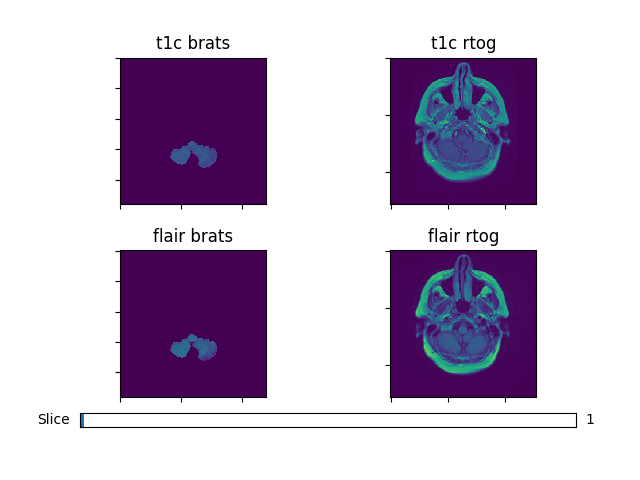

In [8]:
MRIViewer(t1post_brats, t1post_rtog, flair_brats, flair_rtog, cmap=None,\
          title1='t1c brats', title2='t1c rtog', title3='flair brats', title4='flair rtog')

<IPython.core.display.Javascript object>


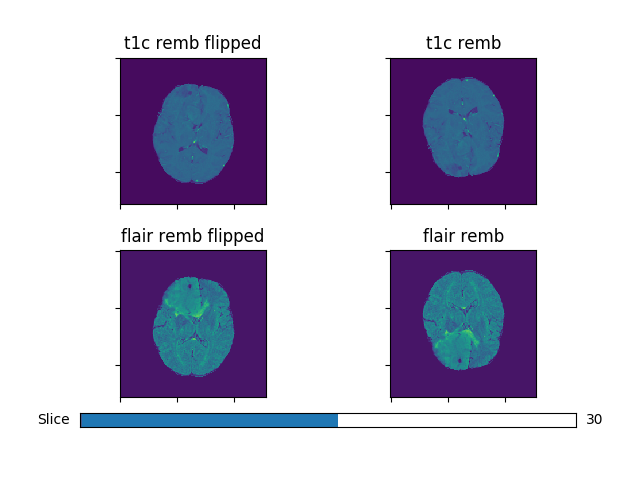

In [9]:
#fliprembrandt images
t1post_remb_flipped = t1post_remb[:, ::-1, :]
flair_remb_flipped = flair_remb[:, ::-1, :]
MRIViewer(t1post_remb_flipped, t1post_remb, flair_remb_flipped, flair_remb, cmap=None,\
          title1='t1c remb flipped', title2='t1c remb', title3='flair remb flipped', title4='flair remb')

### TODO:
- cut off top and bottom of the brain in brats and train only on the new volumes

/usr/local/fsl/bin/bet /usr/local/fsl/bin/imglob rtog_pre/t1c.nii /usr/local/fsl/bin/imglob rtog_post/t1c.nii -f 0.5 -g 0 -m -Z


<IPython.core.display.Javascript object>


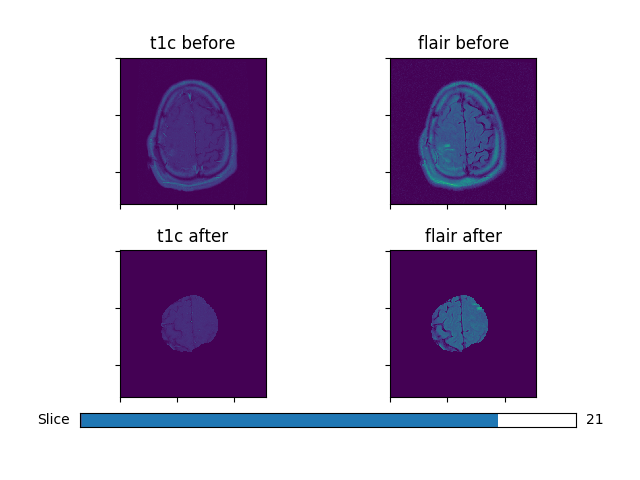

In [2]:
direct = '/home/romains/rtog_ex/'
t1c_pre = im_path_to_arr(os.path.join(direct, 't1/t1c.nii'))
t1c_post = im_path_to_arr(os.path.join(direct, 't1/t1_bcorr_brain.nii'))
flair_pre = im_path_to_arr(os.path.join(direct, 'flair/flair.nii'))
flair_post = im_path_to_arr(os.path.join(direct, 'flair/flair_bcorr_brain.nii'))
MRIViewer(t1c_pre, flair_pre, t1c_post, flair_post, cmap=None,\
          title1='t1c before', title2='flair before', title3='t1c after', title4='flair after')

# other technique

<IPython.core.display.Javascript object>


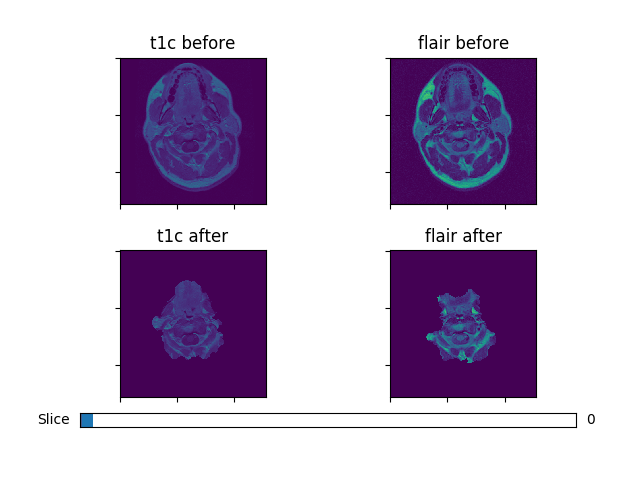

In [3]:
direct = '/home/romains/rtog_ex/'
t1c_pre = im_path_to_arr(os.path.join(direct, 't1/t1c.nii'))
t1c_post = im_path_to_arr(os.path.join(direct, 't1/t1c_brain.nii'))
flair_pre = im_path_to_arr(os.path.join(direct, 'flair/flair.nii'))
flair_post = im_path_to_arr(os.path.join(direct, 'flair/flair_brain.nii'))
MRIViewer(t1c_pre, flair_pre, t1c_post, flair_post, cmap=None,\
          title1='t1c before', title2='flair before', title3='t1c after', title4='flair after')